In [2]:
import pandas as pd
df = pd.read_csv('regression.csv')

### DATA UNDERSTANDING & EXPLORATION

In [3]:
# Look at the dataframe:
pd.set_option('display.width', 1000)
print(df.head())
print(df.tail())

   Year Month Cost Centre  Account Account Description Account Type    Amount
0  2019   Jan       CC100  1000000       Product Sales      Revenue  1344.051
1  2019   Jan       CC100  1000001   Licensing Revenue      Revenue   480.968
2  2019   Jan       CC100  1000002     Service Revenue      Revenue   650.820
3  2019   Jan       CC100  1000004         Fee Revenue      Revenue   339.360
4  2019   Jan       CC100  2000000   Cost of Good Sold      Expense  1125.328
      Year Month Cost Centre  Account  Account Description Account Type    Amount
4207  2021   Dec       CC302  2000005            Purchases      Expense   698.121
4208  2021   Dec       CC302  3000000         Cash at Bank        Asset  -282.056
4209  2021   Dec       CC302  3000001            Inventory        Asset   537.478
4210  2021   Dec       CC302  3000002  Accounts Receivable        Asset  1152.680
4211  2021   Dec       CC302  4000001     Accounts Payable    Liability -1020.000


In [4]:
# Check for missing values to evaluate data quality
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4212 entries, 0 to 4211
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 4212 non-null   int64  
 1   Month                4212 non-null   object 
 2   Cost Centre          4212 non-null   object 
 3   Account              4212 non-null   int64  
 4   Account Description  4212 non-null   object 
 5   Account Type         4212 non-null   object 
 6   Amount               4212 non-null   float64
dtypes: float64(1), int64(2), object(4)
memory usage: 230.5+ KB


In [5]:
# Return df columns
df.columns 

Index(['Year', 'Month', 'Cost Centre', 'Account', 'Account Description', 'Account Type', 'Amount'], dtype='object')

In [6]:
# Check the uniqueness of the values within columns
for col in df.columns:
	print(col, len(df[col].unique()), df[col].unique()) 

Year 3 [2019 2020 2021]
Month 12 ['Jan' 'Feb' 'Mar' 'Apr' 'May' 'Jun' 'Jul' 'Aug' 'Sep' 'Oct' 'Nov' 'Dec']
Cost Centre 9 ['CC100' 'CC101' 'CC102' 'CC200' 'CC201' 'CC202' 'CC300' 'CC301' 'CC302']
Account 13 [1000000 1000001 1000002 1000004 2000000 2000001 2000002 2000003 2000005
 3000000 3000001 3000002 4000001]
Account Description 13 ['Product Sales' 'Licensing Revenue' 'Service Revenue' 'Fee Revenue'
 'Cost of Good Sold' 'Staff Expenses' 'Technology Expenses'
 'Property Expenses' 'Purchases' 'Cash at Bank' 'Inventory'
 'Accounts Receivable' 'Accounts Payable']
Account Type 4 ['Revenue' 'Expense' 'Asset' 'Liability']
Amount 3956 [1344.051  480.968  650.82  ... -282.056  537.478 1152.68 ]


In [7]:
# Check the spread of the data
df.describe()

,Year,Account,Amount
count,4212.000000,4.212000e+03,4212.000000
mean,2020.000000,2.076925e+06,476.470421
std,0.816594,9.167528e+05,477.296234
min,2019.000000,1.000000e+06,-1020.000000
25%,2019.000000,1.000004e+06,268.044500
50%,2020.000000,2.000002e+06,512.998500
75%,2021.000000,3.000000e+06,755.960250
max,2021.000000,4.000001e+06,2378.880000


In [8]:
# Data types
df.dtypes

Year                     int64
Month                   object
Cost Centre             object
Account                  int64
Account Description     object
Account Type            object
Amount                 float64
dtype: object

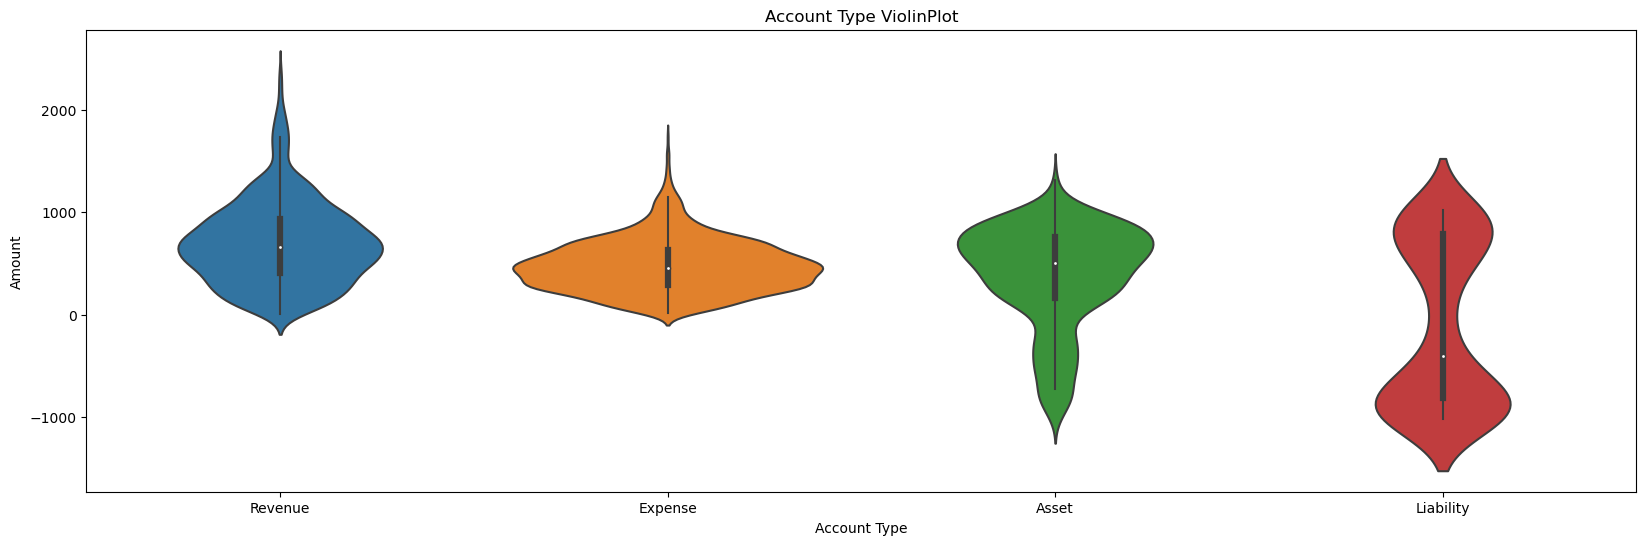

In [9]:
# Visualise the data
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,6))
sns.violinplot(x='Account Type', y='Amount', data=df).set_title('Account Type ViolinPlot')
plt.show()

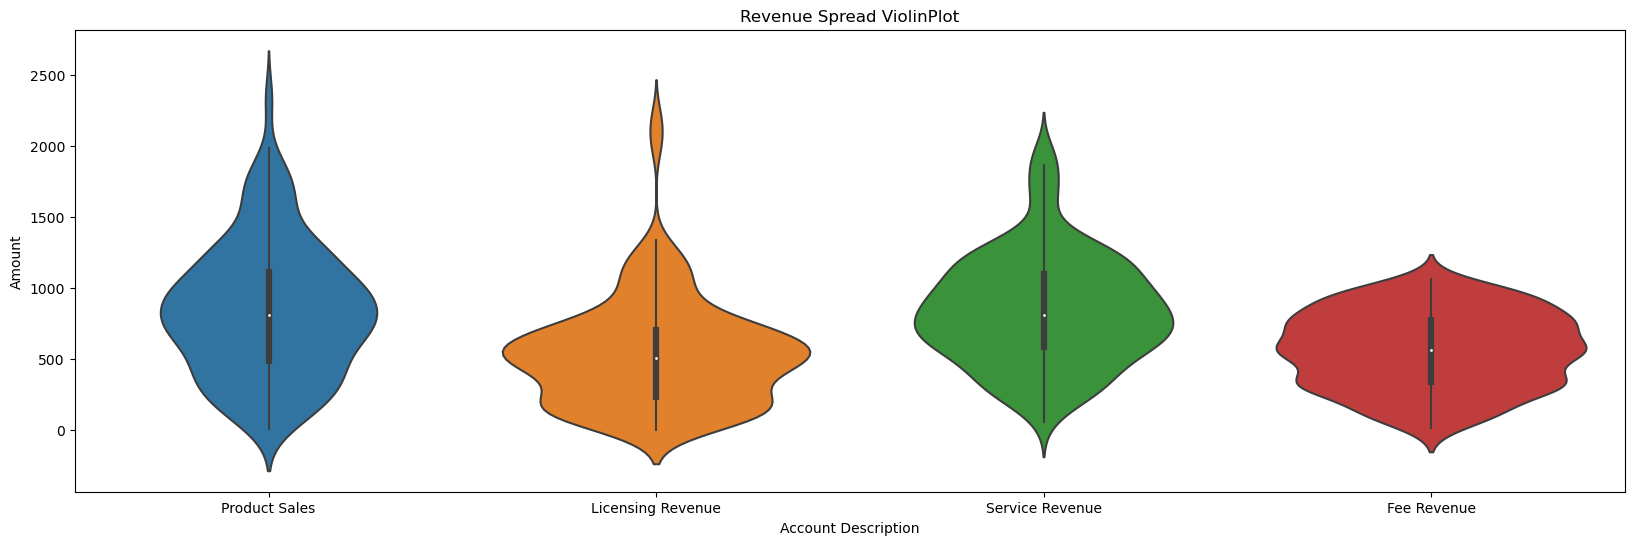

In [10]:
# Investigate further (more granular)
plt.figure(figsize=(20,6))
sns.violinplot(x='Account Description', y='Amount', data=df[df['Account Type']=='Revenue']).set_title('Revenue Spread ViolinPlot')
plt.show()

### DATA PREPARATION
- Removing columns with Pandas
- Fixing data types using .astype()
- one-hot encoding data using .get_dummies

In [11]:
import numpy as np

In [12]:
# Check data types
df.dtypes

Year                     int64
Month                   object
Cost Centre             object
Account                  int64
Account Description     object
Account Type            object
Amount                 float64
dtype: object

In [13]:
# Account is int! The features should be categorical rather than numeric data types. So, stringify them and append the prefix ACC for better readability.
df['Account'] = 'ACC' + df['Account'].astype(str)
print(df.head())
df['Year'] = df['Year'].astype(str)

   Year Month Cost Centre     Account Account Description Account Type    Amount
0  2019   Jan       CC100  ACC1000000       Product Sales      Revenue  1344.051
1  2019   Jan       CC100  ACC1000001   Licensing Revenue      Revenue   480.968
2  2019   Jan       CC100  ACC1000002     Service Revenue      Revenue   650.820
3  2019   Jan       CC100  ACC1000004         Fee Revenue      Revenue   339.360
4  2019   Jan       CC100  ACC2000000   Cost of Good Sold      Expense  1125.328


In [14]:
df.dtypes

Year                    object
Month                   object
Cost Centre             object
Account                 object
Account Description     object
Account Type            object
Amount                 float64
dtype: object

In [15]:
# Confirm that Account and Account Description hold the same data, and drop one to avoid unnecessarily giving the model duplicate data.
# 1. Check length of Account
len(df['Account'].unique())

13

In [16]:
# 2. Check length of Account Description. This time using nunique().
df['Account Description'].nunique()

13

In [17]:
# Combine both to see if they return a combined length of the two
df['Account Validation'] = df['Account'] + df['Account Description']

In [18]:
df.head()

,Year,Month,Cost Centre,Account,Account Description,Account Type,Amount,Account Validation
0,2019,Jan,CC100,ACC1000000,Product Sales,Revenue,1344.051,ACC1000000Product Sales
1,2019,Jan,CC100,ACC1000001,Licensing Revenue,Revenue,480.968,ACC1000001Licensing Revenue
2,2019,Jan,CC100,ACC1000002,Service Revenue,Revenue,650.820,ACC1000002Service Revenue
3,2019,Jan,CC100,ACC1000004,Fee Revenue,Revenue,339.360,ACC1000004Fee Revenue
4,2019,Jan,CC100,ACC2000000,Cost of Good Sold,Expense,1125.328,ACC2000000Cost of Good Sold


In [19]:
# Check the combined length
df['Account Validation'].nunique()

13

In [20]:
# Remove Account Description and Account Validation
df.drop(['Account Description', 'Account Validation'], axis=1, inplace=True)

In [21]:
# Check again
df.head()

,Year,Month,Cost Centre,Account,Account Type,Amount
0,2019,Jan,CC100,ACC1000000,Revenue,1344.051
1,2019,Jan,CC100,ACC1000001,Revenue,480.968
2,2019,Jan,CC100,ACC1000002,Revenue,650.820
3,2019,Jan,CC100,ACC1000004,Revenue,339.360
4,2019,Jan,CC100,ACC2000000,Expense,1125.328


In [22]:
df = pd.get_dummies(df)
print(df.head())

     Amount  Year_2019  Year_2020  Year_2021  Month_Apr  Month_Aug  Month_Dec  Month_Feb  Month_Jan  Month_Jul  ...  Account_ACC2000003  Account_ACC2000005  Account_ACC3000000  Account_ACC3000001  Account_ACC3000002  Account_ACC4000001  Account Type_Asset  Account Type_Expense  Account Type_Liability  Account Type_Revenue
0  1344.051          1          0          0          0          0          0          0          1          0  ...                   0                   0                   0                   0                   0                   0                   0                     0                       0                     1
1   480.968          1          0          0          0          0          0          0          1          0  ...                   0                   0                   0                   0                   0                   0                   0                     0                       0                     1
2   650.820          1      

In [23]:
df.dtypes

Amount                    float64
Year_2019                   uint8
Year_2020                   uint8
Year_2021                   uint8
Month_Apr                   uint8
Month_Aug                   uint8
Month_Dec                   uint8
Month_Feb                   uint8
Month_Jan                   uint8
Month_Jul                   uint8
Month_Jun                   uint8
Month_Mar                   uint8
Month_May                   uint8
Month_Nov                   uint8
Month_Oct                   uint8
Month_Sep                   uint8
Cost Centre_CC100           uint8
Cost Centre_CC101           uint8
Cost Centre_CC102           uint8
Cost Centre_CC200           uint8
Cost Centre_CC201           uint8
Cost Centre_CC202           uint8
Cost Centre_CC300           uint8
Cost Centre_CC301           uint8
Cost Centre_CC302           uint8
Account_ACC1000000          uint8
Account_ACC1000001          uint8
Account_ACC1000002          uint8
Account_ACC1000004          uint8
Account_ACC200

### MODELLING
1. Training ML modelswith Scikit learn
2. Hyperparameter tuning with GridSearchCV
3. Evaluating ML Models




In [24]:
X = df.drop(['Amount'], axis=1)
y = df['Amount']

In [25]:
y

0       1344.051
1        480.968
2        650.820
3        339.360
4       1125.328
          ...   
4207     698.121
4208    -282.056
4209     537.478
4210    1152.680
4211   -1020.000
Name: Amount, Length: 4212, dtype: float64

In [26]:
X

,Year_2019,Year_2020,Year_2021,Month_Apr,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_Jul,Month_Jun,...,Account_ACC2000003,Account_ACC2000005,Account_ACC3000000,Account_ACC3000001,Account_ACC3000002,Account_ACC4000001,Account Type_Asset,Account Type_Expense,Account Type_Liability,Account Type_Revenue
0,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4207,0,0,1,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
4208,0,0,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
4209,0,0,1,0,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4210,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0


In [27]:
# Split the data into training set to train the data and testing set to evaluate the performance of the trained set
from sklearn.model_selection import train_test_split

In [28]:
# Create partitions
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

In [29]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2948, 41) (1264, 41) (2948,) (1264,)


In [30]:
# Train 5 different Models (ML Algorithms) at the same time to see which ones performs best
# Import dependencies
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [31]:
# Create 5 different pipelines, one for each algorithm
pipelines = {
    'rf': make_pipeline(RandomForestRegressor(random_state=1234)),
    'gb': make_pipeline(GradientBoostingRegressor(random_state=1234)),
    'ridge': make_pipeline(Ridge(random_state=1234)),
    'lasso': make_pipeline(Lasso(random_state=1234)),
    'enet': make_pipeline(ElasticNet(random_state=1234)),
}

In [32]:
# Use get_params() to see what parameters are available.
RandomForestRegressor().get_params() 

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [33]:
# Set up hyperparameter grid to tune the models to getter a better prediction using different parameters.
# Create a dictionary with hyperparameters for each Algorithm
hypergrid = {
    'rf': {
        'randomforestregressor__min_samples_split':[2,4,6],
        'randomforestregressor__min_samples_leaf':[1,2,3]
    },
    'gb': {
        'gradientboostingregressor__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.99]
    },
    'ridge': {
        'ridge__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.99]
    },
     'lasso': {
        'lasso__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.99]
    },
     'enet': {
        'elasticnet__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.99]
    }
}

In [34]:
# Import dependency that will perform the hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.exceptions import NotFittedError

In [35]:
# Set up a dictionary to store the trained ML models
fit_models = {}
# loop through the pipelines
for algo, pipeline in pipelines.items():
    #print(algo)
    model = GridSearchCV(pipeline, hypergrid[algo], cv=10, n_jobs=-1)
    try:
        print('Starting training for {}.'.format(algo))
        model.fit(X_train, y_train)
        fit_models[algo] = model
        print('{} has been successfully fit.'.format(algo))
    except NotFittedError as e:
        print(repr(e))
        


Starting training for rf.


rf has been successfully fit.
Starting training for gb.
gb has been successfully fit.
Starting training for ridge.
ridge has been successfully fit.
Starting training for lasso.
lasso has been successfully fit.
Starting training for enet.
enet has been successfully fit.


In [36]:
# Adhoc prediction using the trained model. Access a model and predict.
# Set the print options to display the entire array
#np.set_printoptions(threshold=np.inf) 
fit_models['rf'].predict(X_test)


array([ 551.9051 ,  601.05151,  461.44576, ..., -481.12   ,  624.83343,
       1064.71953])

### EVALUATION
Using: 
1. Mean Absolute Error (MAE): how far away in absolute terms the prediction is from the absolute value.
2. R squared Score (R2): how much variance in the different features the machine learning model is able to explain. 
A higher R2 score shows that the model is perfroming better and a lower value for MAE means that the ML model is performing better.

In [37]:
# Import dependencies
from sklearn.metrics import r2_score, mean_absolute_error


In [38]:
# Loop through and calculate both metrics for each of the models
for algo, model in fit_models.items():
    y_pred = model.predict(X_test)
    print('{} scores - R2: {} MAE:{},'.format(algo, r2_score(y_test, y_pred), mean_absolute_error(y_test, y_pred)))

rf scores - R2: 0.9342019743760693 MAE:76.33576577531646,
gb scores - R2: 0.6353516501682552 MAE:190.8419509203904,
ridge scores - R2: 0.5093625023110636 MAE:224.88706328103015,
lasso scores - R2: 0.509750861393047 MAE:224.4782275114179,
enet scores - R2: 0.5086617173444186 MAE:225.02988780517322,


In [39]:
best_model = fit_models['rf']